In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import keras
from keras.layers import Dense

In [32]:
path=r"D:\Project.csv"
dst=pd.read_csv(path)
dst.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [33]:
#print(x.shape,"\t",y.shape)
dst1=pd.DataFrame(dst)
print(dst1.dtypes)
dst1.info()

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [34]:
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dst1['category']=dst1['category'].map(category)
dst1=dst1[dst.views!='F']
dst1=dst1[dst.likes!='F']
dst1=dst1[dst.dislikes!='F']
dst1=dst1[dst.comment!='F']

<ipython-input-34-249d6a1b9e86>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dst1=dst1[dst.likes!='F']
<ipython-input-34-249d6a1b9e86>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dst1=dst1[dst.dislikes!='F']
<ipython-input-34-249d6a1b9e86>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dst1=dst1[dst.comment!='F']


In [35]:
dst1["views"]=pd.to_numeric(dst1["views"])
dst1["likes"]=pd.to_numeric(dst1["likes"])
dst1["dislikes"]=pd.to_numeric(dst1["dislikes"])
dst1["comment"]=pd.to_numeric(dst1["comment"])
dst1["adview"]=pd.to_numeric(dst1["adview"])

In [36]:
from sklearn.preprocessing import LabelEncoder
dst1['duration']=LabelEncoder().fit_transform(dst1['duration'])
dst1['vidid']=LabelEncoder().fit_transform(dst1['vidid'])
dst1['published']=LabelEncoder().fit_transform(dst1['published'])

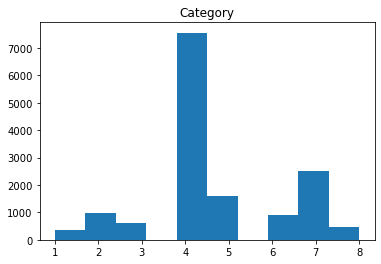

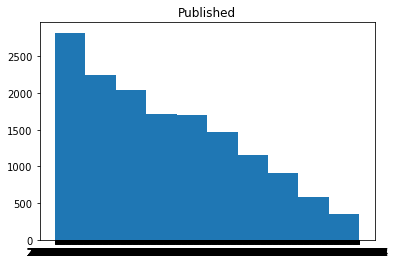

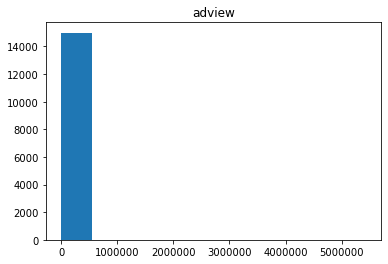

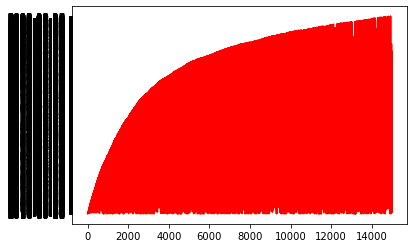

In [37]:
    #PLOTTING THE DATA
plt.hist(dst['category'])
plt.title("Category")
plt.show()

plt.hist(dst['published'])
plt.title("Published")
plt.show()
plt.hist(dst['adview'])
plt.title("adview")
plt.show()
plt.plot(dst['published'],color='red')
dst1=dst1[dst1["adview"]<2000000]

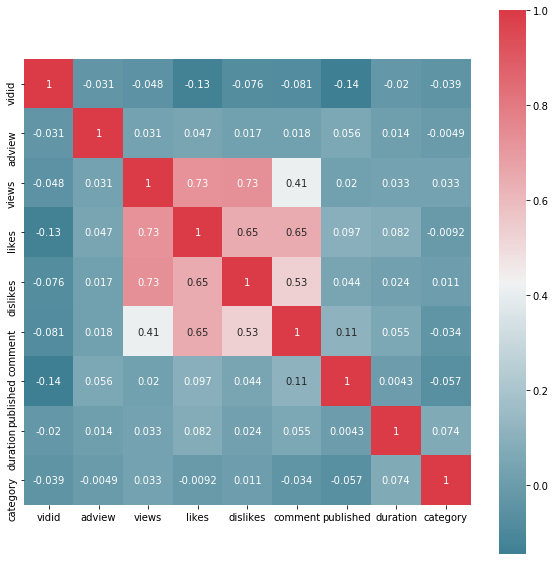

In [38]:
import seaborn as sbn
a,ax=plt.subplots(figsize=(10,10))
corr = dst1.corr()
sbn.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sbn.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

** CONVERTING DURATION TO SECONDS.

In [39]:
import datetime 
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if i=="H":
                h=mm
                mm=''
            elif i=="M":
                m=mm
                mm=''
            else:
                s=mm
                mm=''
    if h=='':
        h='00'
    if s=='':
        s='00'
    if m=='':
        m='00'
    bp=h+':'+m+':'+s
    return bp
train=pd.read_csv(path)
mp = train["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
dst["duration"]=time1
dst.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,457,6
1,VID_14135,2,1707,56,2,6,2016-10-01,570,4
2,VID_2187,1,2023,25,0,2,2016-07-02,136,3
3,VID_23096,6,620860,777,161,153,2016-07-27,262,8
4,VID_10175,1,666,1,0,0,2016-06-29,31,4


In [40]:
y_train=pd.DataFrame(data = dst1.iloc[:, 1].values, columns = ['target'])
dst1=dst1.drop(["vidid"],axis=1)
dst1=dst1.drop(["adview"],axis=1)
dst1.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,2925,6
1,1707,56,2,6,2185,3040,4
2,2023,25,0,2,2094,1863,3
3,620860,777,161,153,2119,2546,8
4,666,1,0,0,2091,1963,4


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dst1,y_train,test_size=0.2,random_state=42)
print(x_train.shape)

(11708, 7)


In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train.mean()

0.25618694991317975

In [44]:
from sklearn import metrics
def print_error(x_test,y_test,model_name):
    prediction=model_name.predict(x_test)
    print("Mean absolute error is ",metrics.mean_absolute_error(y_test,prediction))
    print("Mean squared error is ",metrics.mean_squared_error(y_test,prediction))
    print("RMS error is ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

In [46]:
from sklearn import linear_model
linear_regressor=linear_model.LinearRegression()
linear_regressor.fit(x_train,y_train)
print_error(x_test,y_test,linear_regressor)
from sklearn.svm import SVR
supportvector_regressor=SVR()
supportvector_regressor.fit(x_train,y_train)
print_error(x_test,y_test,linear_regressor)

Mean absolute error is  3718.9740619231143
Mean squared error is  835886630.8152658
RMS error is  28911.70404551184


c:\users\jaijui\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Mean absolute error is  3718.9740619231143
Mean squared error is  835886630.8152658
RMS error is  28911.70404551184


**DECISION TREE AND RANDOM FOREST REGRESSOR

In [54]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor()
decision_tree.fit(x_train,y_train)
print_error(x_test,y_test,decision_tree)
##############
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest=RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(x_train,y_train)
print_error(x_test,y_test,random_forest)

Mean absolute error is  2282.135587431694
Mean squared error is  756546548.1813525
RMS error is  27505.391256649167


<ipython-input-54-76e5a5b36999>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(x_train,y_train)


Mean absolute error is  3296.9002155051935
Mean squared error is  485086392.6587017
RMS error is  22024.676902481493


In [57]:
model=keras.models.Sequential([
                Dense(64,activation='relu',input_shape=x_train.shape[1:]),
                Dense(64,activation="relu"),
                Dense(1)])
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["accuracy"])
history=model.fit(x_train,y_train,epochs=100)
model.summary()
print_error(x_test,y_test,model)

Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767352640.0000 - accuracy: 0.3728
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 766896064.0000 - accuracy: 0.4285
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 765917056.0000 - accuracy: 0.4285
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 764909056.0000 - accuracy: 0.4285
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 764341056.0000 - accuracy: 0.4285
Epoch 6/100
366/366 [==============================] - 1s 3ms/step - loss: 764089920.0000 - accuracy: 0.4285
Epoch 7/100
366/366 [==============================] - 1s 3ms/step - loss: 764003712.0000 - accuracy: 0.4285
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 763967424.0000 - accuracy: 0.4285
Epoch 9/100
366/366 [==============================] - 1s 2ms/step - loss: 763928000.0000 - accuracy: 0.4285
Epoch 10/100
366/36

366/366 [==============================] - 1s 2ms/step - loss: 762143168.0000 - accuracy: 0.4094
Epoch 76/100
366/366 [==============================] - 1s 2ms/step - loss: 762095936.0000 - accuracy: 0.4054
Epoch 77/100
366/366 [==============================] - 1s 3ms/step - loss: 762068352.0000 - accuracy: 0.4064
Epoch 78/100
366/366 [==============================] - 1s 2ms/step - loss: 762047296.0000 - accuracy: 0.4045
Epoch 79/100
366/366 [==============================] - 1s 2ms/step - loss: 761998272.0000 - accuracy: 0.4030
Epoch 80/100
366/366 [==============================] - 1s 2ms/step - loss: 761987520.0000 - accuracy: 0.4019
Epoch 81/100
366/366 [==============================] - 1s 2ms/step - loss: 761937600.0000 - accuracy: 0.4013
Epoch 82/100
366/366 [==============================] - 1s 2ms/step - loss: 761914752.0000 - accuracy: 0.3976
Epoch 83/100
366/366 [==============================] - 1s 3ms/step - loss: 761948736.0000 - accuracy: 0.3962
Epoch 84/100
366/366 [=

**Hence we conclude that random forest definitely performs better that Artificial Neural Network if Mean Squared error is taken as the metric measure for conclusion**

In [58]:
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [81]:
y_pred=model.predict(x_test)
print("Mean Squared error :",metrics.mean_squared_error(y_test, y_pred))

Mean Squared error : 828327876.7119726


In [76]:
y_prediction=random_forest.predict(x_test)
y_prediction.reshape(2928,1)
print(y_prediction)

[ 18.09444493   9.34434839  12.0127884  ...  65.33277085 650.02611882
  14.44067544]


In [72]:
print(y_test)

       target
4791        5
4800        2
3717        5
8876        1
8288        2
...       ...
3694        1
4872        9
6791        1
750         2
10144      11

[2928 rows x 1 columns]


In [79]:
print("Mean Squared error :",metrics.mean_squared_error(y_test, y_prediction))

Mean Squared error : 485086392.6587017


In [104]:
path=r"D:\test.csv"
dsttest=pd.read_csv(path)
dsttest.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [105]:
dsttest=dsttest[dsttest.views!='F']
dsttest=dsttest[dsttest.likes!='F']
dsttest=dsttest[dsttest.dislikes!='F']
dsttest=dsttest[dsttest.comment!='F']
dsttest.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [106]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dsttest["category"]=dsttest["category"].map(category)
dsttest.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [107]:
dsttest["views"]=pd.to_numeric(dsttest["views"])
dsttest["likes"]=pd.to_numeric(dsttest["likes"])
dsttest["dislikes"]=pd.to_numeric(dsttest["dislikes"])
dsttest["comment"]=pd.to_numeric(dsttest["comment"])
column_vidid=dsttest['vidid']
# Endoding features like Category, Duration, Vidid

In [108]:
from sklearn.preprocessing import LabelEncoder
dsttest['duration']=LabelEncoder().fit_transform(dsttest['duration'])
dsttest['vidid']=LabelEncoder().fit_transform(dsttest['vidid'])
dsttest['published']=LabelEncoder().fit_transform(dsttest['published'])
dsttest.head()
# Convert Time_in_sec for duration

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [114]:
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if i=="H":
                h=mm
                mm=''
            elif i=="M":
                m=mm
                mm=''
            else:
                s=mm
                mm=''
    if h=='':
        h='00'
    if s=='':
        s='00'
    if m=='':
        m='00'
    bp=h+':'+m+':'+s
    return bp
train=pd.read_csv(r"D:\test.csv")
mp = train["duration"]
time = mp.apply(checki)
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1=time.apply(func_sec)
dsttest["duration"]=time1
dsttest=dsttest.drop(["vidid"],axis=1)
dsttest.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test2=scaler.fit_transform(dsttest)

In [119]:
y_pred_new=random_forest.predict(X_test2)

In [120]:
print(y_pred_new)

[ 162.78048058 1813.59007754   21.20055742 ... 1610.10443537   16.23323637
  237.18273606]


In [122]:
prediction = pd.DataFrame(y_pred_new, columns=['y_pred_new']).to_csv('Predictions_Submission.csv')